In [2]:
import sys, os
pypath = os.getcwd()
for dir_name in os.listdir():
    dir_path = os.path.join(pypath, dir_name)
    if os.path.isdir(dir_path):
        sys.path += [dir_path]
from tqdm.notebook import tqdm
import time        
import matplotlib.pyplot as plt
from smc import SMC
from lex import LEX
from rgx import RGX


In [3]:
if __name__ == '__main__':
    file = open('tests/test100000.txt')
    data = file.read().split('\n')[:]
    rgx = RGX.RGXParser()
    lex = LEX.LEXParser()
    smc = SMC.SMCParser()

    
    parsers = [rgx, lex, smc]
    data_pars = [[],[],[]]
    lens = []
    l = 0
    for string in data:
        l += len(string)
        lens.append(l)
    history = [[],[],[]]
    for i0, parser in tqdm(enumerate(parsers)):
        start_t = time.perf_counter()
        for i1, string in enumerate(data):
            data_pars[i0].append(parser.parse(string))
            history[i0].append(time.perf_counter() - start_t)


0it [00:00, ?it/s]

In [4]:
data_pars[0] == data_pars[1] == data_pars[2]

True

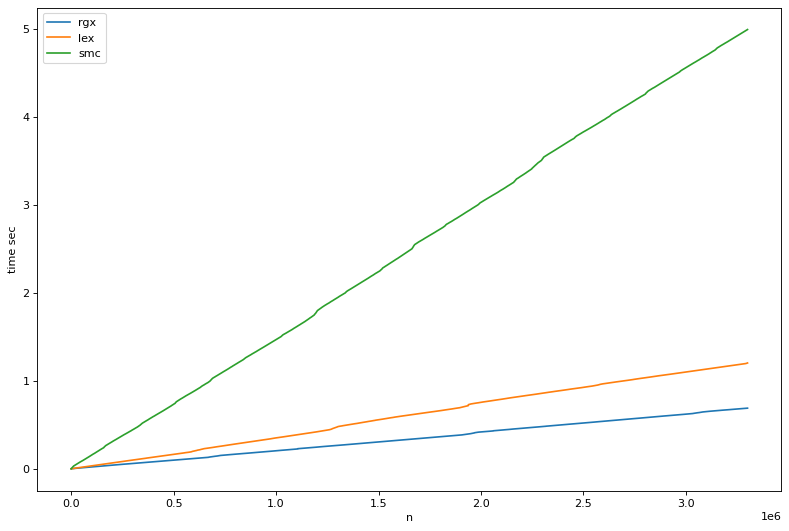

In [7]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)

plt.ylabel('time sec')
plt.xlabel('n')
p = ['rgx', 'lex', 'smc']
for i in range(3):
    plt.plot(lens, history[i], label=p[i])
plt.legend();